In [61]:
import os

In [2]:
os.environ['CUDA_DEVICE_ORDER']='PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [104]:
%autoreload 2
from reco_based import *
from reconstruct import get_from_mat, correct_image, iradon_centered, find_visual_best

In [7]:
angles = get_from_mat("../data/2018_11005553_syn033_68R_Mg10Gd_12w/angles.mat")
shifts = 1.5 * get_from_mat("../data/2018_11005553_syn033_68R_Mg10Gd_12w/offset_shift.mat")

In [8]:
from PIL import Image
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def get_tiffs_from_folder(path='../data/2018_11005553_syn033_68R_Mg10Gd_12w/sino_rawBin2'):
    tiffs = []
    for tiff_file in tqdm(sorted([os.path.join(path, file) for file in os.listdir(path)])[:5]):
        tiffs.append(correct_image(np.array(Image.open(tiff_file)), shifts))
    return np.array(tiffs)

In [9]:
tiffs = get_tiffs_from_folder('../data/2018_11005553_syn033_68R_Mg10Gd_12w/sino_rawBin2')

100%|██████████| 5/5 [00:07<00:00,  1.53s/it]


In [10]:
tiffs.shape

(5, 3001, 2460)

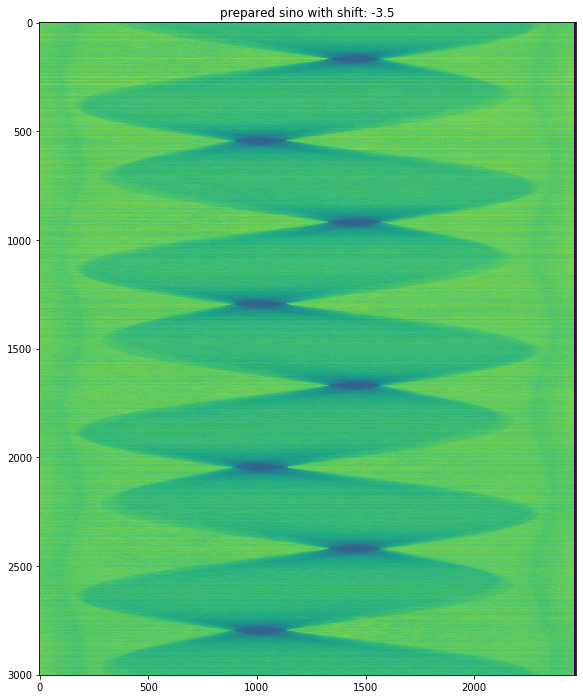

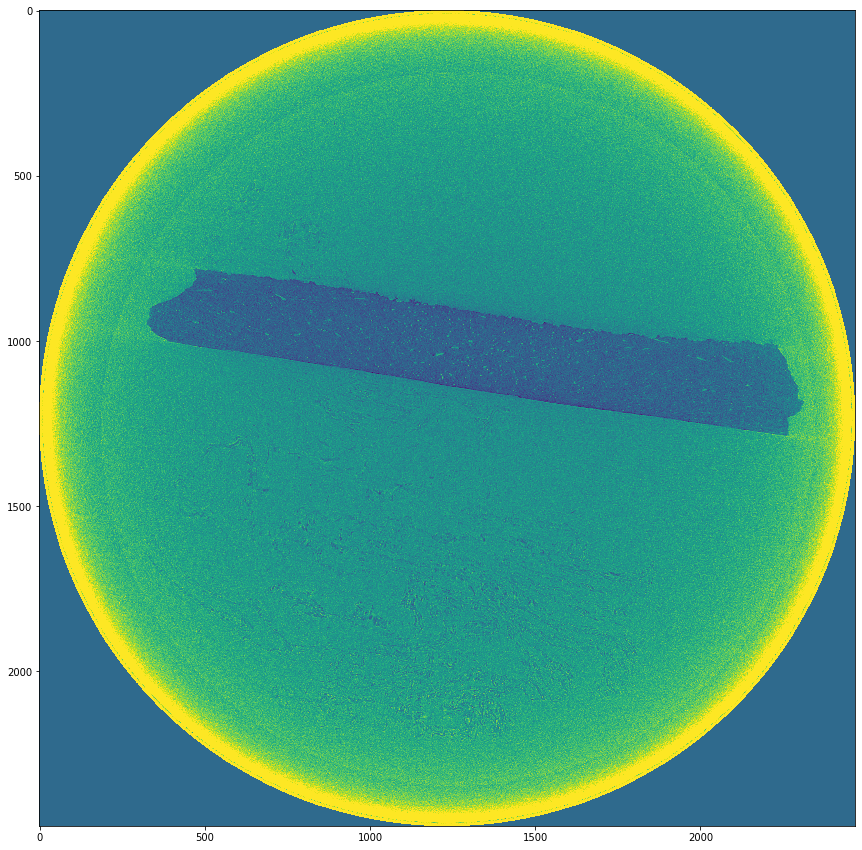

CPU times: user 5min 24s, sys: 51.7 s, total: 6min 15s
Wall time: 6min 15s


In [11]:
%%time
reco = iradon_centered(tiffs[0], angles.squeeze(), tiffs.shape[2] / 2 + 3.5, show=True)

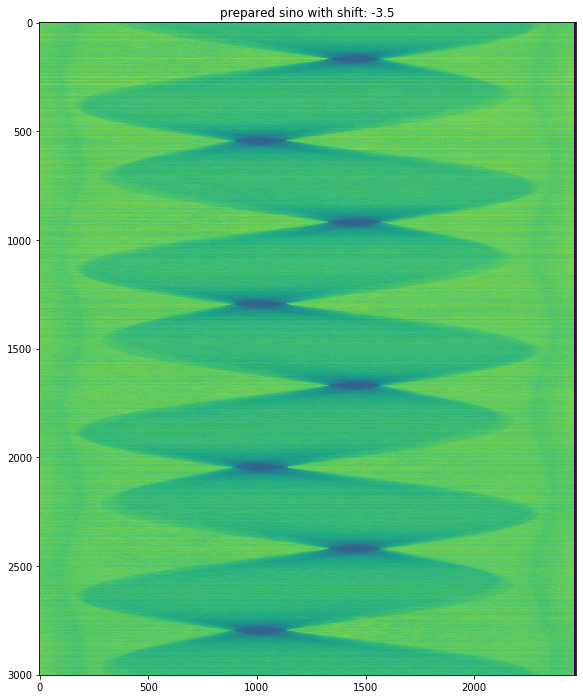

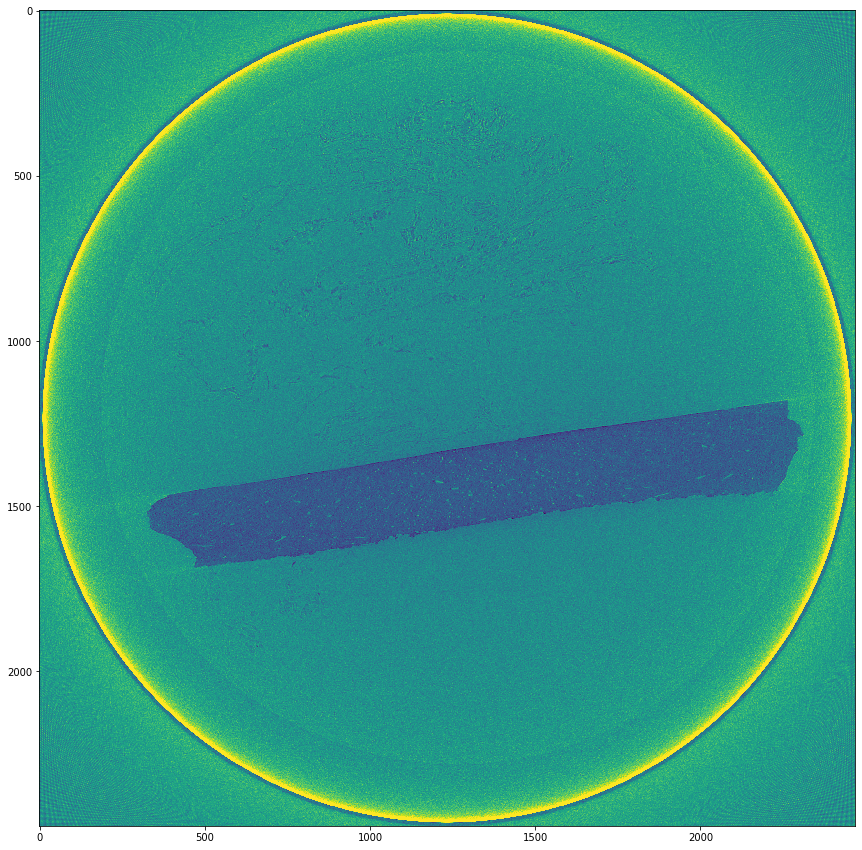

CPU times: user 5min 37s, sys: 52.9 s, total: 6min 30s
Wall time: 6min 30s


In [12]:
%%time
reco = iradon_centered(tiffs[0], angles.squeeze(), tiffs.shape[2] / 2 + 3.5, lib='radontea', show=True)

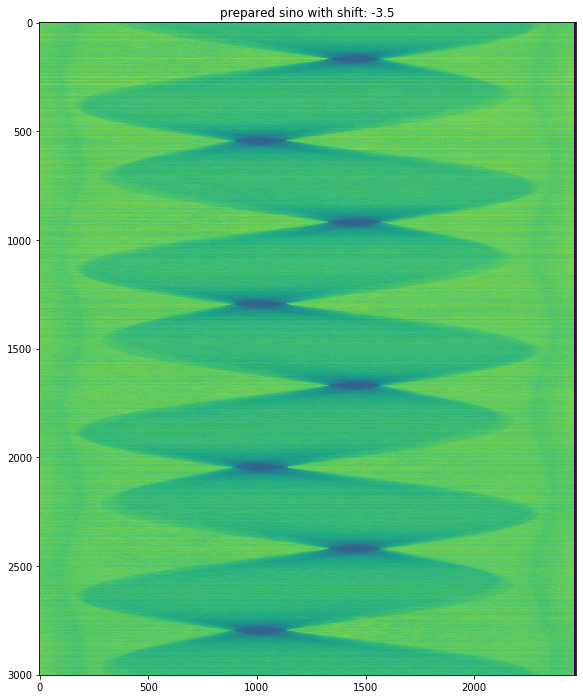

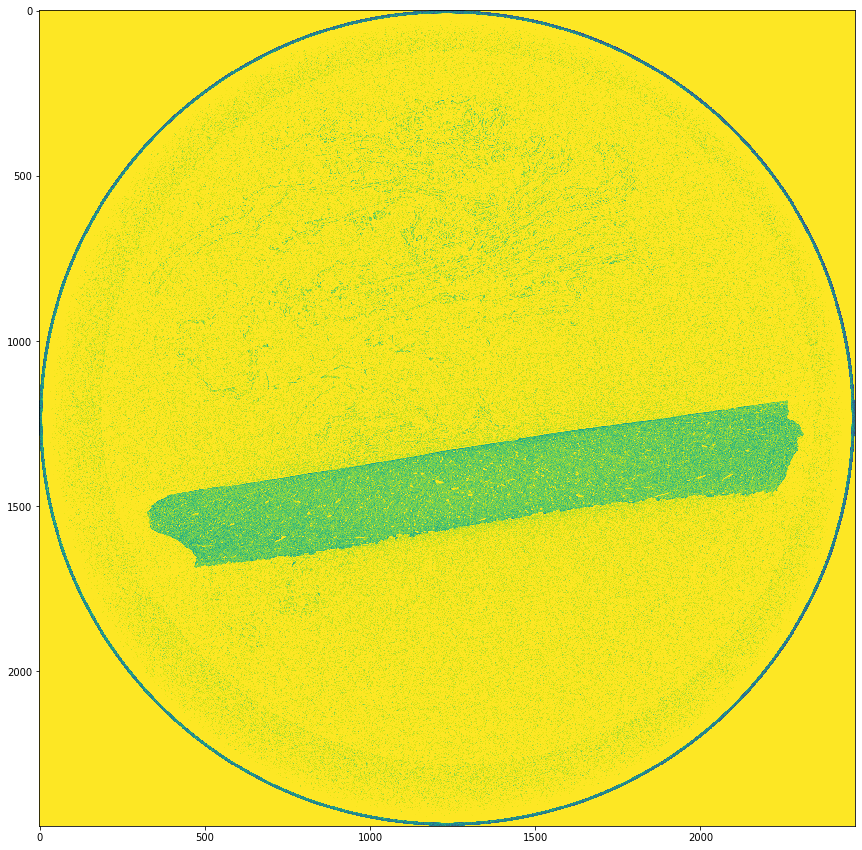

CPU times: user 9min 8s, sys: 3min 4s, total: 12min 12s
Wall time: 12min 12s


In [64]:
%%time
reco_numpy = iradon_centered(tiffs[0], angles.squeeze(), tiffs.shape[2] / 2 + 3.5, lib='custom_np', show=True)

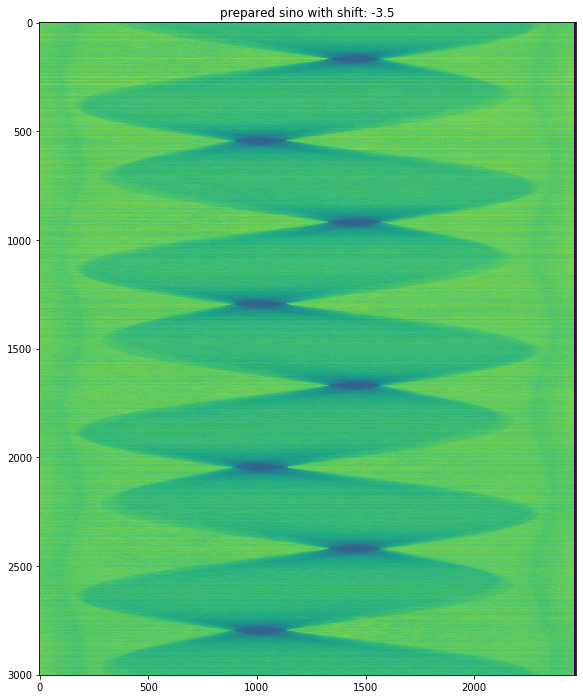

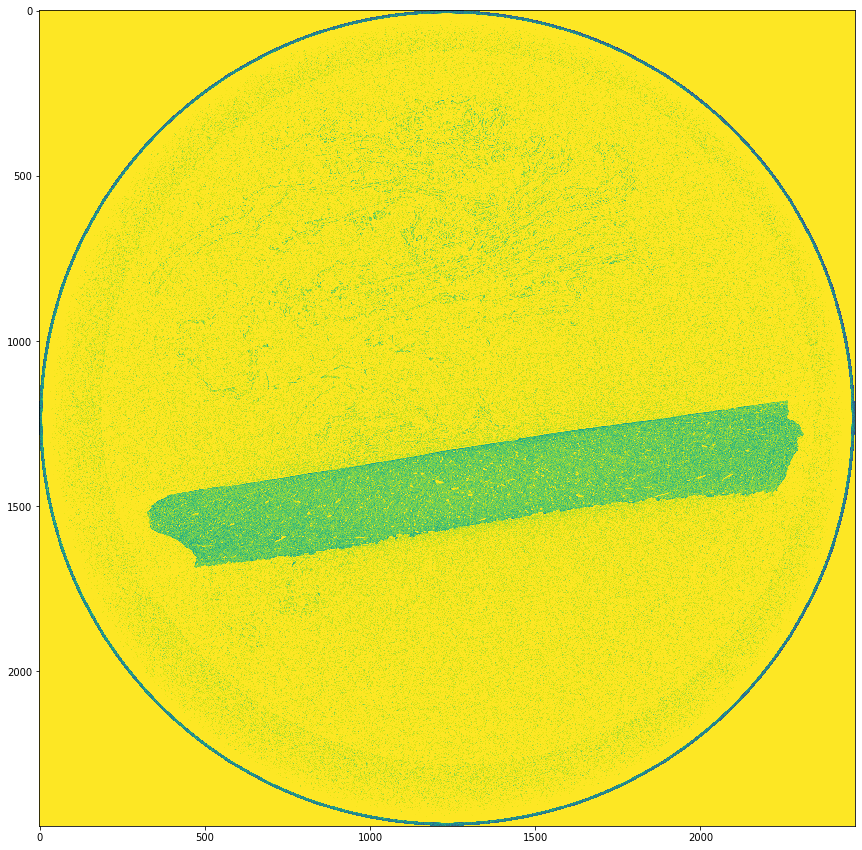

CPU times: user 4min 10s, sys: 10.2 s, total: 4min 20s
Wall time: 1min 14s


In [105]:
%%time
with tf.device('/gpu:0'):
    reco_tf = iradon_centered(tiffs[0], angles.squeeze(), tiffs.shape[2] / 2 + 3.5, lib='custom_tf', show=True)

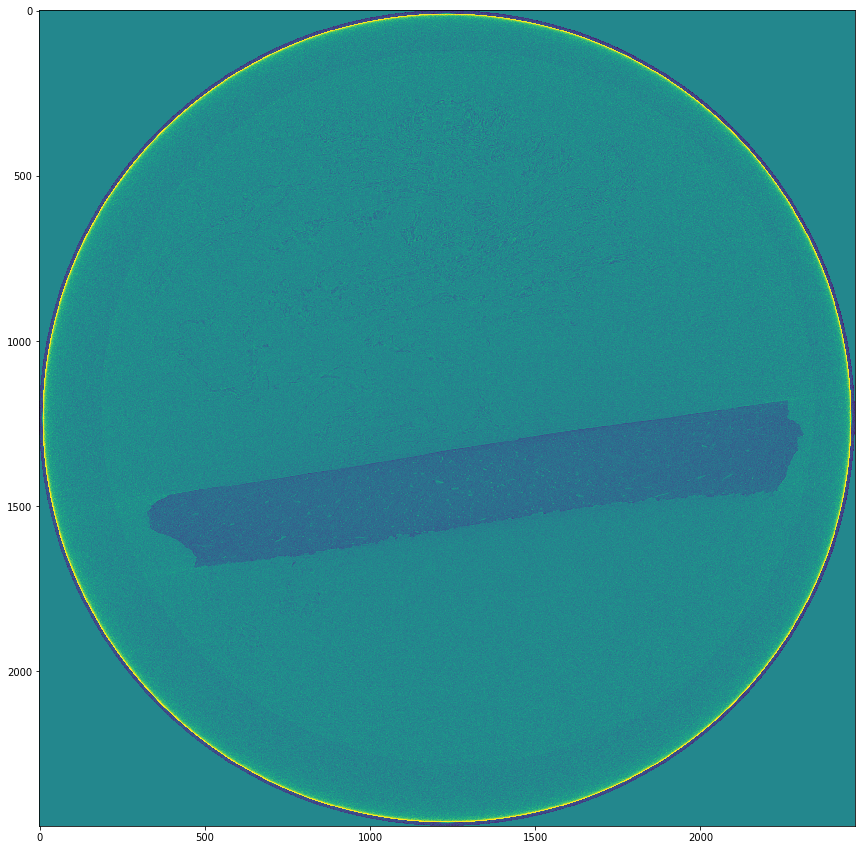

In [145]:
plt.figure(figsize=(15, 15))
plt.imshow(reco_tf, vmax=0.3)
plt.show()

In [90]:
reco_numpy[1000:1500, 1000:1500]

array([[-0.0010268 , -0.0166087 ,  0.05181084, ..., -0.0132041 ,
        -0.01406569,  0.00564469],
       [-0.00180237,  0.00324251,  0.01092028, ...,  0.00279367,
        -0.02627496, -0.0386438 ],
       [ 0.02599676,  0.01741126, -0.03117899, ...,  0.02181383,
        -0.0132998 , -0.01545182],
       ...,
       [-0.09414394, -0.07279445, -0.06763157, ..., -0.08282933,
        -0.03838507, -0.05182363],
       [-0.05983687, -0.06863453, -0.06775824, ..., -0.05907187,
        -0.08752945, -0.10319174],
       [-0.06086051, -0.07348306, -0.05057265, ..., -0.07365173,
        -0.06703026, -0.09068658]])

In [106]:
reco_tf[1000:1500, 1000:1500]

array([[-0.0010268 , -0.0166087 ,  0.05181084, ..., -0.0132041 ,
        -0.01406569,  0.00564469],
       [-0.00180237,  0.00324251,  0.01092028, ...,  0.00279367,
        -0.02627496, -0.0386438 ],
       [ 0.02599676,  0.01741126, -0.03117899, ...,  0.02181383,
        -0.0132998 , -0.01545182],
       ...,
       [-0.09414394, -0.07279445, -0.06763157, ..., -0.08282933,
        -0.03838507, -0.05182363],
       [-0.05983687, -0.06863453, -0.06775824, ..., -0.05907187,
        -0.08752945, -0.10319174],
       [-0.06086051, -0.07348306, -0.05057265, ..., -0.07365173,
        -0.06703026, -0.09068658]])

In [92]:
reco[1000:1500, 1000:1500]

array([[ 8.30664761e-05,  6.12829973e-05,  2.95788809e-04, ...,
         1.02965330e-04,  1.09053873e-04,  1.02500590e-04],
       [ 9.40993581e-05,  1.30272376e-04,  1.50442368e-04, ...,
         1.18459591e-04,  3.70270036e-05, -6.74363131e-06],
       [ 3.08285275e-04,  3.33678437e-04,  5.50902081e-05, ...,
         1.98937507e-04,  7.05972909e-05,  1.38515003e-04],
       ...,
       [-2.72838786e-04, -1.61638550e-04, -1.12132996e-04, ...,
        -2.72596339e-04, -1.08068974e-04, -1.41623344e-04],
       [-1.91556134e-04, -1.99069155e-04, -1.22767238e-04, ...,
        -1.52535649e-04, -2.87310998e-04, -3.29243750e-04],
       [-1.89314213e-04, -1.83094346e-04, -9.55318374e-05, ...,
        -2.20354229e-04, -2.16965363e-04, -2.77116207e-04]])

## Test methods

In [123]:
%autoreload 2
from reco_based import *
from functools import partial

In [47]:
import tqdm
tqdm.tqdm._instances.clear()

In [52]:
%%time
predict, temp_loss = run_method_on_set(tiffs[0], angles.squeeze(), reconstructor=partial(iradon_centered, lib='scipy'))

100%|██████████| 30/30 [2:09:59<00:00, 259.98s/it]  

CPU times: user 1h 51min 23s, sys: 18min 40s, total: 2h 10min 4s
Wall time: 2h 9min 59s


In [53]:
predict

-3.0823929438360964

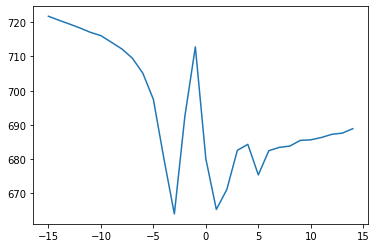

In [54]:
plt.plot(np.arange(-15, 15), temp_loss)
plt.show()

In [96]:
%%time
predict, temp_loss = run_method_on_set(tiffs[0], angles.squeeze(), reconstructor=partial(iradon_centered, lib='radontea'))

100%|██████████| 30/30 [2:16:48<00:00, 273.60s/it]  

CPU times: user 1h 57min 54s, sys: 18min 58s, total: 2h 16min 52s
Wall time: 2h 16min 48s


In [97]:
predict

-0.03522730918049283

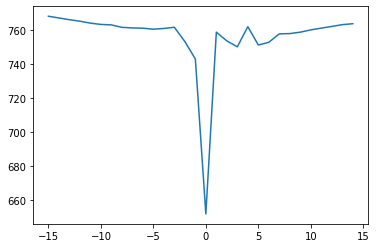

In [98]:
plt.plot(np.arange(-15, 15), temp_loss)
plt.show()

100%|██████████| 30/30 [36:47<00:00, 73.59s/it]

predict: -0.15878638759874775


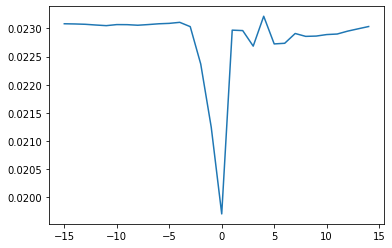

TypeError: 'numpy.float64' object is not iterable

In [107]:
%%time
with tf.device('/gpu:0'):
    predict = run_method_on_set(tiffs[0], angles.squeeze(), reconstructor=partial(iradon_centered, lib='custom_tf'))

## Numerical differenciation 

In [134]:
%%time
with tf.device('/gpu:0'):
    predict = run_method_diff(tiffs[0], angles.squeeze(), eps=0.25, step=0.0001, reconstructor=partial(iradon_centered, lib='custom_tf'))

1229.75 1230.25
iter: 0 sums: 103603.73534820208 135400.32789888218 gradient: 63593.1851013602 new_shift: 0.0 update: 6.359318510136021
1236.109318510136 1236.609318510136
iter: 1 sums: 140263.56714776278 140263.56714776278 gradient: 0.0 new_shift: 6.359318510136021 update: 0.0
CPU times: user 16min 40s, sys: 39.5 s, total: 17min 19s
Wall time: 4min 53s


In [135]:
%%time
with tf.device('/gpu:0'):
    predict = run_method_diff(tiffs[0], angles.squeeze(), eps=0.05, step=0.0001, reconstructor=partial(iradon_centered, lib='custom_tf'))

1229.95 1230.05
iter: 0 sums: 122947.90639607751 135400.32789888218 gradient: 124524.21502804675 new_shift: 0.0 update: 12.452421502804675
1242.4024215028048 1242.5024215028047
iter: 1 sums: 142068.77272071192 142068.77272071192 gradient: 0.0 new_shift: 12.452421502804675 update: 0.0
CPU times: user 16min 45s, sys: 36.2 s, total: 17min 22s
Wall time: 4min 53s


In [136]:
%%time
with tf.device('/gpu:0'):
    predict = run_method_diff(tiffs[0], angles.squeeze(), eps=0.1, step=0.0001, reconstructor=partial(iradon_centered, lib='custom_tf'))

1229.9 1230.1
iter: 0 sums: 117447.97170156229 135400.32789888218 gradient: 89761.78098659948 new_shift: 0.0 update: 8.976178098659949
1238.8761780986601 1239.07617809866
iter: 1 sums: 140468.13421678095 140815.36962859478 gradient: 1736.1770590691594 new_shift: 8.976178098659949 update: 0.17361770590691594
1239.0497958045669 1239.2497958045667
iter: 2 sums: 140815.36962859478 140815.36962859478 gradient: 0.0 new_shift: 9.149795804566864 update: 0.0
CPU times: user 25min 2s, sys: 58.1 s, total: 26min
Wall time: 7min 19s


In [137]:
%%time
with tf.device('/gpu:0'):
    predict = run_method_diff(tiffs[0], angles.squeeze(), eps=0.25, step=0.5, step_size='fixed', reconstructor=partial(iradon_centered, lib='custom_tf'))

1229.75 1230.25
iter: 0 sums: 103603.73534820208 135400.32789888218 gradient: 63593.1851013602 new_shift: 0.0 update: 0.5
1230.25 1230.75
iter: 1 sums: 135400.32789888218 135400.32789888218 gradient: 0.0 new_shift: 0.5 update: 0.0
CPU times: user 16min 31s, sys: 41.2 s, total: 17min 12s
Wall time: 4min 52s


In [138]:
%%time
predict = run_method_diff(tiffs[0], angles.squeeze(), eps=0.25, step=0.01, reconstructor=partial(iradon_centered, lib='scipy'))

1229.75 1230.25
iter: 0 sums: 603.1934978674373 655.7445531973449 gradient: 105.10211065981525 new_shift: 0.0 update: 0.10510211065981526
CPU times: user 7min 23s, sys: 1min 14s, total: 8min 38s
Wall time: 8min 38s


In [139]:
%%time
predict = run_method_diff(tiffs[0], angles.squeeze(), eps=0.1, step=0.01, reconstructor=partial(iradon_centered, lib='scipy'))

1229.9 1230.1
iter: 0 sums: 663.184458599656 655.7445531973449 gradient: -37.19952701155535 new_shift: 0.0 update: -0.003719952701155535
CPU times: user 7min 21s, sys: 1min 15s, total: 8min 37s
Wall time: 8min 36s


In [140]:
%%time
predict = run_method_diff(tiffs[0], angles.squeeze(), eps=0.25, step=0.5, step_size='fixed', reconstructor=partial(iradon_centered, lib='scipy'))

1229.75 1230.25
iter: 0 sums: 603.1934978674373 655.7445531973449 gradient: 105.10211065981525 new_shift: 0.0 update: 0.5
1230.25 1230.75
iter: 1 sums: 655.7445531973449 655.7445531973449 gradient: 0.0 new_shift: 0.5 update: 0.0
CPU times: user 14min 42s, sys: 2min 31s, total: 17min 14s
Wall time: 17min 13s


Ideas:

* Unceratinty estimaion using GP

## Ruuuun on all tiffs